In [139]:
import tensorflow as tf
import ipywidgets as widgets
from IPython.display import display
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import Model
import numpy as np
import pandas as pd

from keras.preprocessing.image import img_to_array


In [18]:
BATCH_SIZE = 150
SIZE = 256
def load_input(image_file1):
  input_image= tf.io.read_file(image_file1)
  input_image= tf.image.decode_jpeg(input_image)
  input_image = tf.cast(input_image, tf.float32)
  return input_image

def resize(input_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image

def normalize(input_image):
  input_image = (input_image /255.0)
  return input_image



def load_image_train(image_file1):
  input_image= load_input(image_file1)
  input_image = normalize(input_image)
  input_image = resize(input_image,SIZE, SIZE)
  return input_image
def get_images(PATH):
    train_dataset_inp=tf.data.Dataset.list_files(PATH+'/*.png',shuffle=False)
    train_dataset_inp=train_dataset_inp.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    train_dataset=train_dataset_inp.batch(BATCH_SIZE)
    _data = next(iter(train_dataset))
    print("Data Loaded sucessfully")
    return _data

In [19]:


PATH1 = '/Users/ME/Desktop/editing images/Data/moustach'
PATH2 = '/Users/ME/Desktop/editing images/Data/no moustach'
PATH3 = '/Users/ME/Desktop/editing images/Data/lens'
PATH4 = '/Users/ME/Desktop/editing images/Data/no lens'
PATH5 = '/Users/ME/Desktop/editing images/Data/smiling'
PATH6 = '/Users/ME/Desktop/editing images/Data/not smiling'
PATH7 = '/Users/ME/Desktop/editing images/Data/male'
PATH8 = '/Users/ME/Desktop/editing images/Data/female'
PATH9 = '/Users/ME/Desktop/editing images/Data/young'
PATH10 = '/Users/ME/Desktop/editing images/Data/old'

moustach = get_images(PATH1)
no_moustach = get_images(PATH2)
lens = get_images(PATH3)
no_lens = get_images(PATH4)
smiling = get_images(PATH5)
no_smiling = get_images(PATH6)
male = get_images(PATH7)
female = get_images(PATH8)
young = get_images(PATH9)
old = get_images(PATH10)






Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully
Data Loaded sucessfully


In [25]:
def plot_pair(data):
    plt.figure(figsize = (8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.title(f"{i}")
        plt.imshow(data[i])
       
        plt.axis('off')
        
  

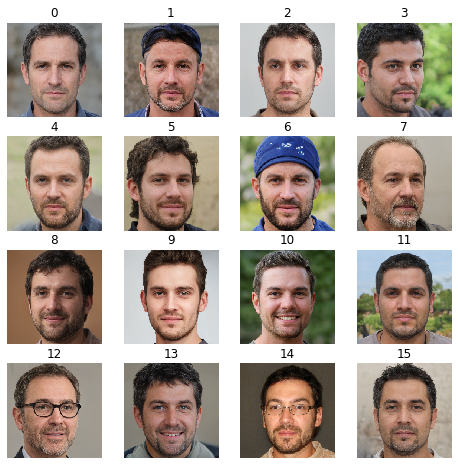

In [26]:
plot_pair(moustach)

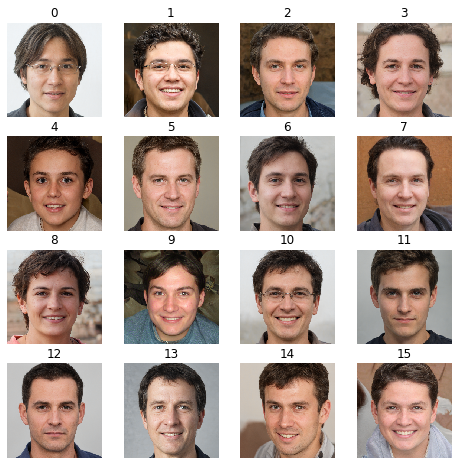

In [27]:
plot_pair(no_moustach)

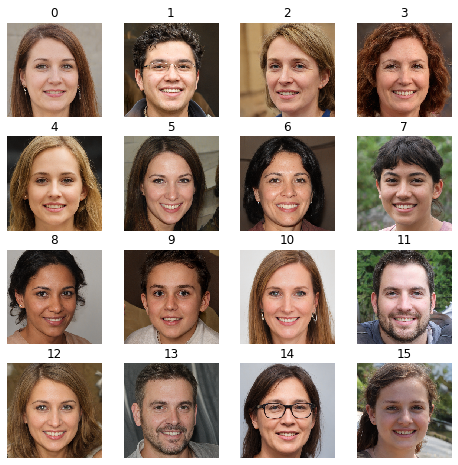

In [28]:
plot_pair(smiling)

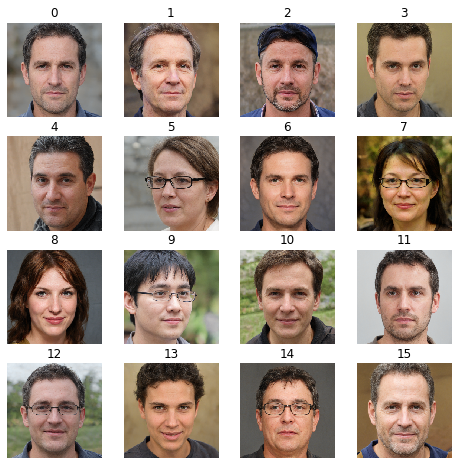

In [30]:
plot_pair(no_smiling)

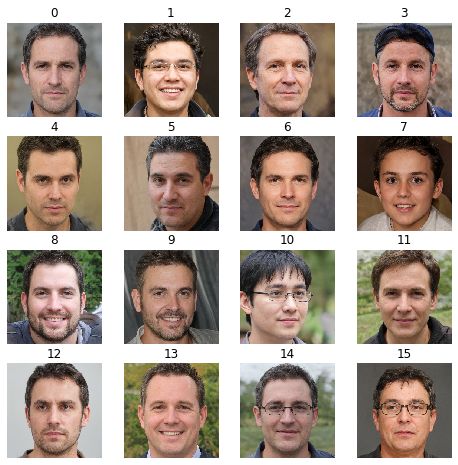

In [31]:
plot_pair(male)

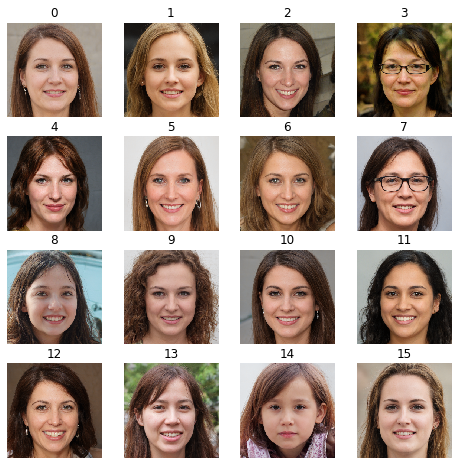

In [32]:
plot_pair(female)

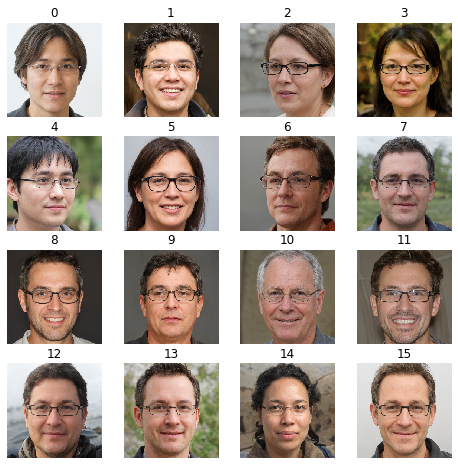

In [33]:
plot_pair(lens)

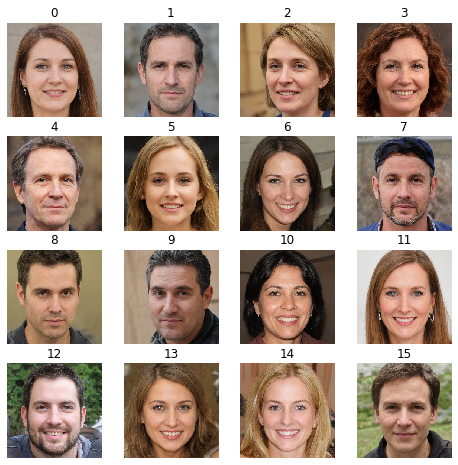

In [34]:
plot_pair(no_lens)

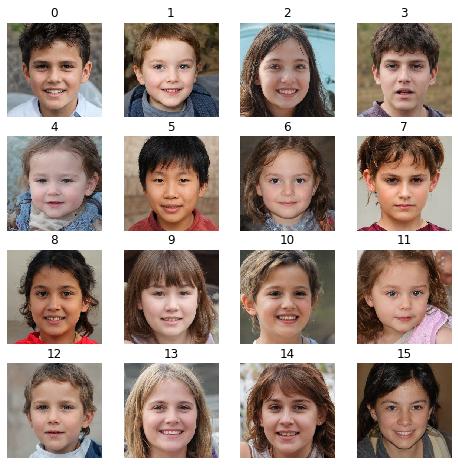

In [35]:
plot_pair(young)

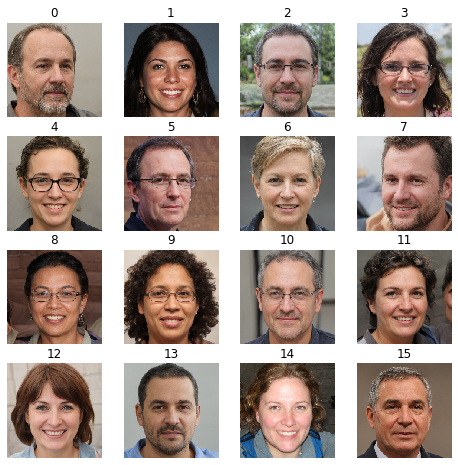

In [36]:
plot_pair(old)

## Loading Pretrained models

In [38]:
decoder = tf.keras.models.load_model('pre-trained models/decoder250.h5')
encoder = tf.keras.models.load_model('pre-trained models/encoder250.h5')

In [39]:

def difference_vector(arr1,arr2):
    arrA = 0
    arrB = 0
    for i in range(len(arr1)):
        arrA += encoder(np.reshape(arr1[i],(1,SIZE,SIZE,3)))
    for i in range(len(arr2)):
        arrB += encoder(np.reshape(arr2[i],(1,SIZE,SIZE,3)))
    difference = arrA/len(arr1) - arrB/len(arr2)
    return difference[0]

lens_vector= difference_vector(lens,no_lens)
smile_vector = difference_vector(smiling, no_smiling)
moustach_vector = difference_vector(moustach, no_moustach)
male_female_vector = difference_vector(male, female)
young_old_vector = difference_vector(young,old)




## Visualization

## Smiling face to non smiling face

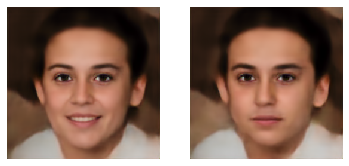

In [64]:
data = smiling
i = 9
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = -1.2
a = np.array(li) + alpha * np.array(smile_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## Non smiling face to smiling face

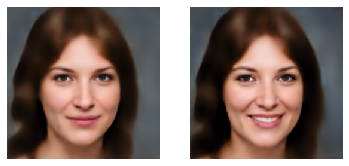

In [69]:
data = no_smiling
i = 8
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = 1.5
a = np.array(li) + alpha * np.array(smile_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## Adding and removing moustach 

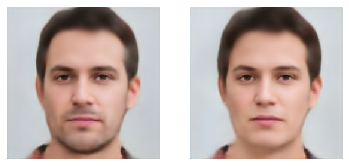

In [80]:
data = moustach
i = 2
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = -1.2
a = np.array(li) + alpha * np.array(moustach_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

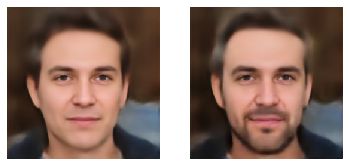

In [83]:
data = no_moustach
i = 2
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = 1.5
a = np.array(li) + alpha * np.array(moustach_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## Adding and removing lens

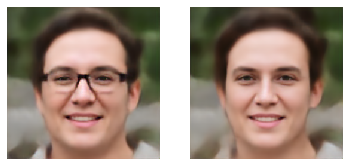

In [148]:
data = lens
i = 19
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = -1.3
a = np.array(li) + alpha * np.array(lens_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

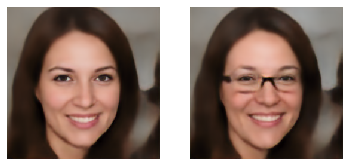

In [95]:
data = no_lens
i = 6
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = 1.6
a = np.array(li) + alpha * np.array(lens_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## Young and old

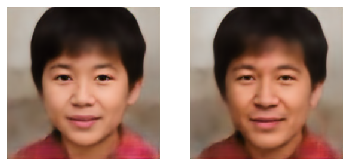

In [102]:
data = young
i = 5
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = -1
a = np.array(li) + alpha * np.array(young_old_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

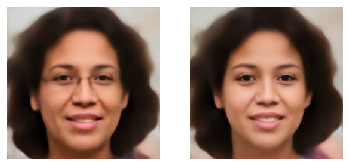

In [106]:
data = old
i = 9
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = 1
a = np.array(li) + alpha * np.array(young_old_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## male female

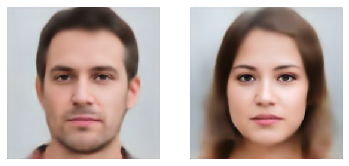

In [128]:
data = male
i = 12
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = -1.8
a = np.array(li) + alpha * np.array(male_female_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

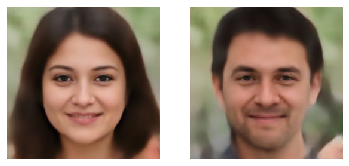

In [136]:
data = female
i = 20
li = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
plt.subplot(121)
generate_image(li)
alpha = 1.6
a = np.array(li) + alpha * np.array(male_female_vector)
a = a.tolist()
plt.subplot(122)
generate_image(a)

## OVERALL EDIT

In [151]:
def generate_image(*arg):
    li = arg[0]
    latent_values = np.array([li])
    reconstruction = np.array(decoder(latent_values))
    reconstruction = reconstruction.reshape(SIZE,SIZE,3)
    reconstruction = np.clip(reconstruction,0,1)
    plt.imshow(reconstruction)
    plt.axis('off')
    
def edit_images(smile,moustach,young_old,male_female,lens ):
    i = 2
    data = no_smiling
    encoded_image = encoder(np.reshape(data[i],(1,SIZE,SIZE,3)))[0].numpy().tolist()
    plt.figure(figsize = (9,9))
    plt.subplot(121)
    generate_image(encoded_image)
    
    image = (np.array(encoded_image) + smile * np.array(smile_vector) + moustach * np.array(moustach_vector)
            + lens * np.array(lens_vector)+ male_female * np.array(male_female_vector)
            + young_old * np.array(young_old_vector))
    
  
    image = image.tolist()
    plt.subplot(122)
    generate_image(image)
    
_min = -2.5
_max = 2.5

image_generator = widgets.interact(
    edit_images,
    smile=(widgets.FloatSlider(min=_min, max=_max, step=0.25)),
    moustach=(widgets.FloatSlider(min=_min, max=_max, step=0.25)),
    young_old=(widgets.FloatSlider(min=_min, max=_max, step=0.25)),
    male_female=(widgets.FloatSlider(min=_min, max=_max, step=0.25)),
    lens =(widgets.FloatSlider(min=-3, max=3, step=0.25)),
    
)

interactive(children=(FloatSlider(value=0.0, description='smile', max=2.5, min=-2.5, step=0.25), FloatSlider(v…